In [10]:
import pandas as pd
import glob

file_list = glob.glob('data/*001.csv')
df_list = []
for file in file_list:
    df = pd.read_csv(file, names=['id', 'message'])
    df['date'] = file.split('_')[2]
    df['message'] = df['message'].apply(lambda x: x.replace('ifg@', ''))
    df_sample = df.sample(n=1000, random_state=1234)  # 무작위로 1000개만 생성
    df_list.append(df_sample)

final_df = pd.concat(df_list, ignore_index=True)
final_df.head()
final_df.to_csv('data/data.csv', index=False)

In [11]:
df = pd.read_csv('data/data.csv')
df.head()

,id,message,date
0,7776,"[국제발신]듀>#가입선물⚽️버거 커피⚽️*만#상시⚽️포인트, 피자카 kt*** 텔 ...",20220725
1,5567,"[국제발신]NO*TV 제휴안내잠뱃ＪB-****.COMCODE: NT**쳣②*,먜**...",20220725
2,1130,"[국제발신]증권사 인증 없이 종목별, 매수평단가 진단 **회 제공, 샘플보시고 신청...",20220725
3,2059,[국외발신]스마일 경마 정시마감 상한가 ****만한경삼쌍 가능차감지급없음 smr**...,20220725
4,3438,[국제발신]*╉* *+* **+* **+***╉** **+** ***+**ⓑi-ⓒⓑ...,20220725


In [12]:
df['message_length'] = df['message'].apply(len)
df.groupby('date')['message_length'].agg(['min', 'max', 'mean']).reset_index()

,date,min,max,mean
0,20220725,9,199,57.974
1,20220825,13,204,59.387
2,20220927,20,887,64.361
3,20221024,12,1125,144.691
4,20221125,12,2210,147.848
5,20230113,15,2243,99.774
6,20230312,17,1141,96.517
7,20230517,18,2510,167.052


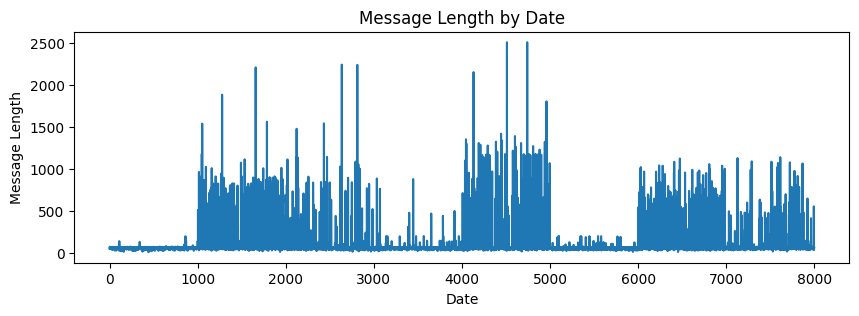

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 3))
plt.plot(df['message_length'])
plt.title('Message Length by Date')
plt.xlabel('Date')
plt.ylabel('Message Length')
plt.show()

In [14]:
import numpy as np

date_list = df['date'].unique().tolist()
for date in date_list:
    filtered_df = df[(df['date'] == date) & (df['message'].str.len() >= 50) & (df['message'].str.len() <= 200)]
    
    if len(filtered_df) > 100:
        filtered_df = filtered_df.sample(n=100, random_state=np.random.randint(1000))
    
    filtered_messages = filtered_df['message'].to_list()
    if filtered_messages:
        globals()[f'message_{date}'] = filtered_messages

In [15]:
import re

def remove_special_characters(text):
    return re.sub(r'[^a-zA-Z0-9가-힣\s.,!]', '', text)

for date in date_list:
    globals()[f'message_{date}_text'] = ''
    
    messages = globals()[f'message_{date}']
    half_index = len(messages) // 2  

    for i, m in enumerate(messages):
        if i < half_index:
            clean_message = remove_special_characters(m)
            globals()[f'message_{date}_text'] += '<문자시작> ' + clean_message + ' <문자끝>\n'
        else:
            globals()[f'message_{date}_text'] += '<문자시작> ' + m + ' <문자끝>\n'

In [16]:
file_path = "spam_text.txt"
with open(file_path, "w") as file:
    file.write(message_20230312_text)

In [20]:
for date in date_list:
    file_path = "txt/spam_"+str(date)+'.txt' 
    with open(file_path, "w") as file:
        file.write(globals()[f'message_{date}_text'])